In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
def rotate_img(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = img
    gray = cv2.bitwise_not(gray)
    
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    print(angle)
    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    print(angle)
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

In [3]:
def median_subtract(noisy_img):
    noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)
    background=cv2.medianBlur(noisy_img, 25)  # Kernel size is 25
    result=cv2.subtract(background, noisy_img)
    result=cv2.bitwise_not(result) # reverse foreground and bg color ( make fg as black and bg as white)
    thresh = cv2.threshold(result, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1] 
    # 2nd parameter min threshold value, 3rd parameter - max threshold value, 4th param - binary as well as otsu
    return (thresh, background)

In [4]:
dirty_img = cv2.imread('./image/aug/aug_48-shruthi_4.jpeg')
rotated =  rotate_img(dirty_img)
result, background=median_subtract(rotated)
cv2.imwrite( './medianfilter-clean.jpeg', result)

0.0
-0.0


True

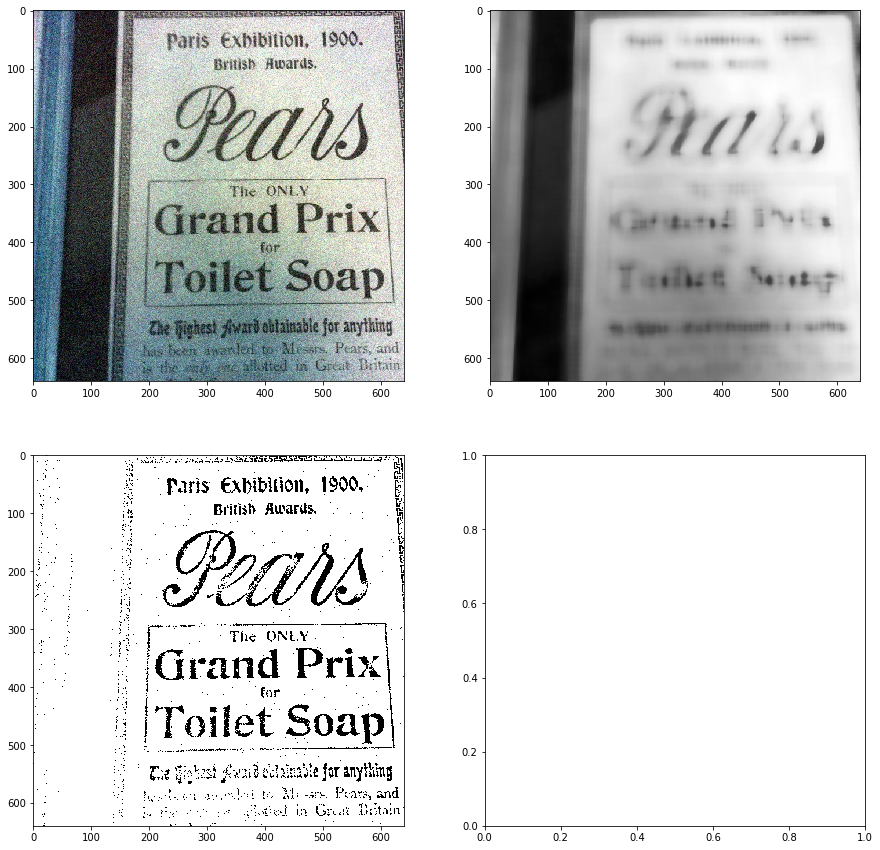

In [5]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(dirty_img, cmap='gray')
axarr[0,1].imshow(background, cmap='gray')
axarr[1,0].imshow(result, cmap='gray')